# GCP Data Manipulation

This notebook is dedicated to shifting data around my various GCP buckets.

I'd like the following my bucket:
* 1 folder with all the data (train/valid/test & val_test, a combination of valid + test)
* 1 folder with 10% of the data (train/test) - this should have the same distribution as the whole data

**Note:** I've combined the validation and test folders in `/val_test/`.

Mainly working with this resource: https://cloud.google.com/storage/docs/gsutil/commands/cp

In [7]:
import os
# Get all filepaths
train_imgs = os.listdir("train")
#val_imgs = os.listdir("validation")
test_imgs = os.listdir("val_test")
train_imgs[:3],len(test_imgs), len(train_imgs)

(['0213d790e89c9f2a.jpg', 'ea585f0a157679db.jpg', '8f8c68e58073738a.jpg'],
 1730,
 34835)

In [4]:
len(train_imgs), len(val_imgs), len(test_imgs)

(34835, 859, 2112)

In [9]:
# Make folder which combines validation and test images (val images only have 800, test images only have 2000)
os.mkdir("val_test")
!cp -a validation/. val_test/
!cp -a test/. val_test/

In [12]:
# Check length of combined validation and test images
val_test_imgs = os.listdir("val_test")
print(len(val_test_imgs) == len(val_imgs + test_imgs))
len(val_test_imgs)

True


2971

In [13]:
# Use filepaths to move 10% of val_test and train (at random) into subset folders
os.mkdir("train_10")
os.mkdir("val_test_10")

In [18]:
from shutil import copy
import random

# Get random 10% of trian/val_test image paths
train_10_imgs = random.sample(train_imgs, len(train_imgs)//10)
val_test_10_imgs = random.sample(val_test_imgs, len(val_test_imgs)//10)
len(train_10_imgs), len(val_test_10_imgs)

(3483, 297)

In [20]:
# Move 10% of train images into their own folder
for img in train_10_imgs:
    #print(f"Copying: {img}")
    copy("train/"+img, "train_10")

Copying: 9569d683cf89eec8.jpg
Copying: da180caa6d3ab45d.jpg
Copying: 00b34adad08af621.jpg
Copying: 691ed71edf42bac9.jpg
Copying: ebfacf5c0540fe0d.jpg
Copying: 6722ccb5fdcfc9d3.jpg
Copying: 32b0b015cce46919.jpg
Copying: 79df4b882d93d8ea.jpg
Copying: a972894662afe15f.jpg
Copying: 406dcd912b5d8c38.jpg
Copying: 20e5fd490b22037a.jpg
Copying: 717892d78bedc353.jpg
Copying: 00a2ac8059da0512.jpg
Copying: 07209d0ef2ed0036.jpg
Copying: baa947b9a74a4e54.jpg
Copying: a1e49915f7589d55.jpg
Copying: 0dc18078bd60f908.jpg
Copying: 3d1371d65c8bdfe5.jpg
Copying: 09513f295141c57d.jpg
Copying: 32fb8f58b0ccaf27.jpg
Copying: 1c7ed47705414b74.jpg
Copying: d843b99e62bbe97a.jpg
Copying: 16d97933fd9c263c.jpg
Copying: 4d689cd1223905de.jpg
Copying: 5109259febd5b190.jpg
Copying: 0d845c70df06aad2.jpg
Copying: d854c136c5b982f5.jpg
Copying: 10db48798ec014c2.jpg
Copying: 43c822f0ab198276.jpg
Copying: ac380abb3290a7e2.jpg
Copying: 0d22ec4983f49930.jpg
Copying: 8469d0019bdaa5a5.jpg
Copying: b99fca80bc96c979.jpg
Copying: f

In [22]:
# Move 10% of val_test images into their own folder
for img in val_test_10_imgs:
    #print(f"Copying: {img}")
    copy("val_test/"+img, "val_test_10")

In [23]:
len(os.listdir("train_10")), len(os.listdir("val_test_10"))

(3483, 297)

In [32]:
# Check to see if train_10 matches the images in the folder
print(sorted(os.listdir("train_10")) == sorted(train_10_imgs))
print(sorted(os.listdir("val_test_10")) == sorted(val_test_10_imgs))

True
True


## Move images to GCP
Now some data manipulation has happened, time to move all image folders to a GCP bucket for later use.

Example GCP code: `gsutil cp *.txt gs://my-bucket` (moves all `.txt` files in current directory to `my-bucket` on GCP.

When copying large amounts of files, I should use: `gsutil -m cp -r dir gs://my-bucket`

In [42]:
# # 10% of training data
# !gsutil -m cp -r train_10 gs://airbnb-amenity-detection/open-images-data

# # Training data
# !gsutil -m cp -r train gs://airbnb-amenity-detection/open-images-data

# # Combined validation and test sets    
# !gsutil -m cp -r val_test gs://airbnb-amenity-detection/open-images-data
    
# # 10% of combined validation and test sets
# !gsutil -m cp -r val_test_10 gs://airbnb-amenity-detection/open-images-data

Copying file://val_test_10/9ee4d07829846ff3.jpg [Content-Type=image/jpeg]...
Copying file://val_test_10/614a58f39595275a.jpg [Content-Type=image/jpeg]...
Copying file://val_test_10/abcc1aee8d01eda7.jpg [Content-Type=image/jpeg]...    
Copying file://val_test_10/313f51fc7ef2a042.jpg [Content-Type=image/jpeg]...    
Copying file://val_test_10/54f4b29c1fdd1fd7.jpg [Content-Type=image/jpeg]...    
Copying file://val_test_10/ed47757457c3b029.jpg [Content-Type=image/jpeg]...    
Copying file://val_test_10/4b73b22c34db28db.jpg [Content-Type=image/jpeg]...
Copying file://val_test_10/4f9aedd1219875d2.jpg [Content-Type=image/jpeg]...
Copying file://val_test_10/e130ae23817a582e.jpg [Content-Type=image/jpeg]...
Copying file://val_test_10/075e388e097e7156.jpg [Content-Type=image/jpeg]...
Copying file://val_test_10/b50483f7668f354a.jpg [Content-Type=image/jpeg]...
Copying file://val_test_10/b249cdc271987228.jpg [Content-Type=image/jpeg]...
Copying file://val_test_10/ee47ccab89a75d0d.jpg [Content-Typ

## Check distributions of images
Figure out the distributions of different classes of images in my datasets.
* Do they match Airbnb's distributions?
* Are the train/test splits (the 10%) representative of what's going on in the full datasets?

In [1]:
import pandas as pd
from preprocessing import format_annotations

In [2]:
# Classes of amenities Airbnb mostly cares about
subset = ['Toilet',
         'Swimming pool',
         'Bed',
         'Billiard table',
         'Sink',
         'Fountain',
         'Oven',
         'Ceiling fan',
         'Television',
         'Microwave oven',
         'Gas stove',
         'Refrigerator',
         'Kitchen & dining room table',
         'Washing machine',
         'Bathtub',
         'Stairs',
         'Fireplace',
         'Pillow',
         'Mirror',
         'Shower',
         'Couch',
         'Countertop',
         'Coffeemaker',
         'Dishwasher',
         'Sofa bed',
         'Tree house',
         'Towel',
         'Porch',
         'Wine rack',
         'Jacuzzi']

In [3]:
valid_annots = format_annotations(image_folder="validation", 
                                  annotation_file="validation-annotations-bbox.csv", 
                                  target_classes=subset)
valid_annots.head()

,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,IsGroupOf,IsDepiction,IsInside,ClassName,ClassID
281915,eccb080e57b2aac5,xclick,/m/03dnzn,1,0.302941,0.905882,0.470067,1.000000,0,0,0,0,0,Bathtub,0
154433,82ed3a2de7df67a8,xclick,/m/03dnzn,1,0.143750,0.882812,0.427083,0.997917,1,1,0,0,0,Bathtub,0
167727,8e562fee6ff208f7,xclick,/m/03dnzn,1,0.494523,0.984351,0.545833,1.000000,0,1,0,0,0,Bathtub,0
257033,d7d469cb4c7e8cd2,xclick,/m/03dnzn,1,0.000000,0.998437,0.435417,1.000000,0,1,0,0,0,Bathtub,0
75788,3f66fdf9688514d4,xclick,/m/03dnzn,1,0.050350,0.932867,0.251748,1.000000,0,1,0,0,0,Bathtub,0


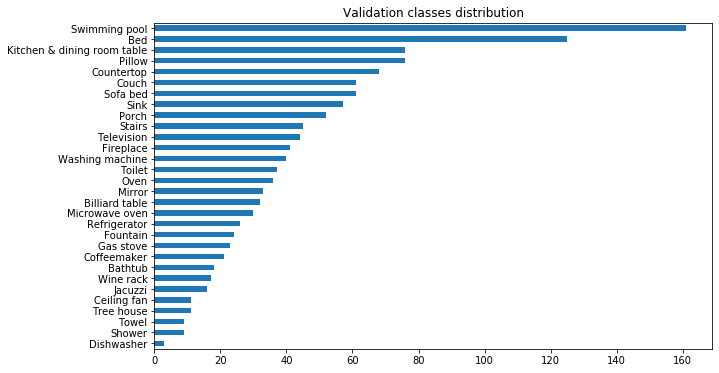

In [4]:
valid_annots.ClassName.value_counts().sort_values().plot(kind="barh", title="Validation classes distribution", figsize=(10, 6));

In [5]:
valid_annots.to_csv("subset-valid-annotations.csv", index=False)

### Training distribution

In [6]:
train_annots = format_annotations(image_folder="train", 
                                  annotation_file="train-annotations-bbox.csv", 
                                  target_classes=subset)
train_annots.head()

,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,IsGroupOf,IsDepiction,IsInside,ClassName,ClassID
3454445,38bbd240e3dd6d2b,xclick,/m/03dnzn,1,0.00,0.997917,0.362500,0.998438,1,1,0,0,0,Bathtub,0
9051090,9a2f2850b2b6895e,xclick,/m/03dnzn,1,0.00,0.823750,0.382500,0.999167,1,1,0,0,0,Bathtub,0
6401293,6be60d5453217a0e,xclick,/m/03dnzn,1,0.00,0.999375,0.361163,0.917448,1,1,0,0,0,Bathtub,0
1158763,1123ab5e8d902bcb,xclick,/m/03dnzn,1,0.00,0.999375,0.391714,0.999058,1,1,0,0,0,Bathtub,0
533268,06e19a68abf5dde4,xclick,/m/03dnzn,1,0.24,0.630000,0.515625,0.930625,1,0,0,0,0,Bathtub,0


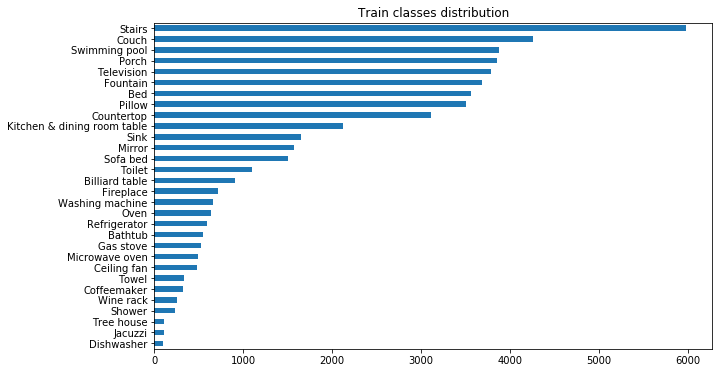

In [7]:
train_annots.ClassName.value_counts().sort_values().plot(kind="barh", title="Train classes distribution", figsize=(10, 6));

In [8]:
train_annots.ClassName.value_counts()

Stairs                         5981
Couch                          4259
Swimming pool                  3881
Porch                          3854
Television                     3789
Fountain                       3691
Bed                            3563
Pillow                         3508
Countertop                     3113
Kitchen & dining room table    2127
Sink                           1648
Mirror                         1572
Sofa bed                       1501
Toilet                         1099
Billiard table                  912
Fireplace                       711
Washing machine                 655
Oven                            637
Refrigerator                    592
Bathtub                         545
Gas stove                       526
Microwave oven                  485
Ceiling fan                     478
Towel                           338
Coffeemaker                     323
Wine rack                       254
Shower                          235
Tree house                  

In [9]:
# Save formatted and subset of annotations to CSV
train_annots.to_csv("subset-train-annotations.csv", index=False)

### Test distribution

In [48]:
test_annots = format_annotations(image_folder="test", 
                                     annotation_file="test-annotations-bbox.csv", 
                                     target_classes=subset)
test_annots.head()

,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,IsGroupOf,IsDepiction,IsInside,ClassName,ClassID
431305,ad2e3b563bf9eef5,freeform,/m/03dnzn,1,0.000035,1.000000,0.000007,1.000000,0,0,0,0,0,Bathtub,0
611091,f9f6d0ce7325d286,freeform,/m/03dnzn,1,0.012309,0.933887,0.781339,1.000000,0,0,0,0,0,Bathtub,0
400753,a108e2b6835d757c,freeform,/m/03dnzn,1,0.000104,0.999913,0.142911,0.999998,0,0,0,0,0,Bathtub,0
388381,9bbe5902409bfdca,freeform,/m/03dnzn,1,0.641643,1.000000,0.539640,1.000000,0,1,0,0,0,Bathtub,0
56610,1574c030df3accac,freeform,/m/03dnzn,1,0.089474,0.423140,0.450507,0.830147,0,0,0,0,0,Bathtub,0


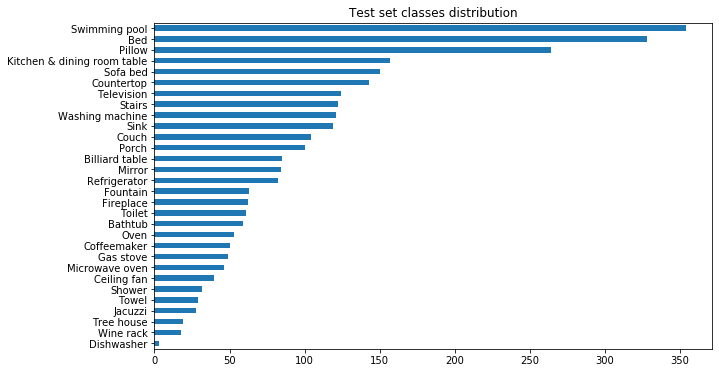

In [49]:
test_annots.ClassName.value_counts().sort_values().plot(kind="barh", title="Test set classes distribution", figsize=(10, 6));

In [50]:
test_annots.ClassName.value_counts()

Swimming pool                  354
Bed                            328
Pillow                         264
Kitchen & dining room table    157
Sofa bed                       150
Countertop                     143
Television                     124
Stairs                         122
Washing machine                121
Sink                           119
Couch                          104
Porch                          100
Billiard table                  85
Mirror                          84
Refrigerator                    82
Fountain                        63
Fireplace                       62
Toilet                          61
Bathtub                         59
Oven                            53
Coffeemaker                     50
Gas stove                       49
Microwave oven                  46
Ceiling fan                     40
Shower                          32
Towel                           29
Jacuzzi                         28
Tree house                      19
Wine rack           

### 10% of training data distribution

In [45]:
train_10_annots = format_annotations(image_folder="train_10", 
                                     annotation_file="train-annotations-bbox.csv", 
                                     target_classes=subset)
train_10_annots.head()

,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,IsGroupOf,IsDepiction,IsInside,ClassName,ClassID
1158763,1123ab5e8d902bcb,xclick,/m/03dnzn,1,0.000000,0.999375,0.391714,0.999058,1,1,0,0,0,Bathtub,0
11151925,bf1659a6948fd6f6,xclick,/m/03dnzn,1,0.139167,0.999167,0.344375,0.999375,1,1,0,0,0,Bathtub,0
10509875,b3da48968f56ccbe,xclick,/m/03dnzn,1,0.000000,0.999375,0.000000,0.999167,1,1,0,0,0,Bathtub,0
1270645,13067d0ea6ee89f8,xclick,/m/03dnzn,1,0.109375,0.999375,0.196813,0.999063,1,1,0,0,0,Bathtub,0
9310493,9ec96a976764024a,xclick,/m/03dnzn,1,0.000000,0.999375,0.446667,0.999167,1,1,0,0,0,Bathtub,0


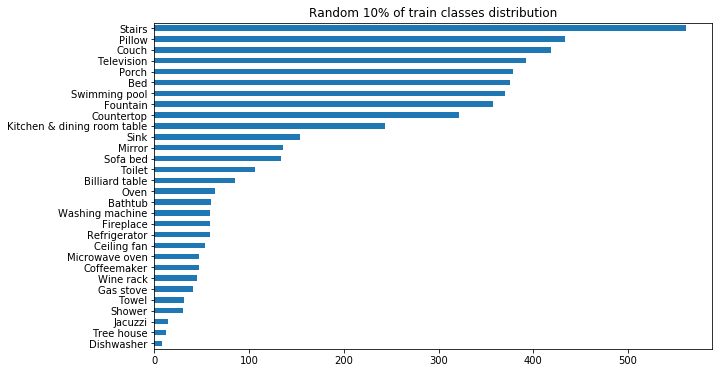

In [46]:
train_10_annots.ClassName.value_counts().sort_values().plot(kind="barh", title="Random 10% of train classes distribution", figsize=(10, 6));

In [47]:
train_10_annots.ClassName.value_counts()

Stairs                         561
Pillow                         433
Couch                          419
Television                     392
Porch                          379
Bed                            375
Swimming pool                  370
Fountain                       357
Countertop                     321
Kitchen & dining room table    243
Sink                           154
Mirror                         136
Sofa bed                       134
Toilet                         106
Billiard table                  85
Oven                            64
Bathtub                         60
Washing machine                 59
Fireplace                       59
Refrigerator                    59
Ceiling fan                     53
Microwave oven                  47
Coffeemaker                     47
Wine rack                       45
Gas stove                       41
Towel                           31
Shower                          30
Jacuzzi                         14
Tree house          

In [51]:
# Save train_10 annotations to CSV
train_10_annots.to_csv("subset-train-10-annotations.csv", index=False)

## Combine Test & Validation Labels

Since I'm using a data split called val_test (combination of validation and test labels), I need to combine them.

In [10]:
val_annotations = pd.read_csv("validation-annotations-bbox.csv")
test_annotations = pd.read_csv("test-annotations-bbox.csv")
val_annotations.head()

,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,IsGroupOf,IsDepiction,IsInside
0,0001eeaf4aed83f9,xclick,/m/0cmf2,1,0.022673,0.964200,0.071038,0.800546,0,0,0,0,0
1,000595fe6fee6369,xclick,/m/02wbm,1,0.000000,1.000000,0.000000,1.000000,0,0,1,0,0
2,000595fe6fee6369,xclick,/m/02xwb,1,0.141384,0.179676,0.676275,0.731707,0,0,0,0,0
3,000595fe6fee6369,xclick,/m/02xwb,1,0.213549,0.253314,0.299335,0.354767,1,0,0,0,0
4,000595fe6fee6369,xclick,/m/02xwb,1,0.232695,0.288660,0.490022,0.545455,1,0,0,0,0


In [11]:
# Combine test & validation annotations into 1 file
val_test_annotations = val_annotations.append(test_annotations)
len(val_test_annotations), len(val_annotations) + len(test_annotations)

(929262, 929262)

In [73]:
# Save to CSV for later use
# val_test_annotations.to_csv("val-test-annotations.csv", index=False)

In [12]:
val_test_annots = format_annotations(image_folder="val_test",
                                     annotation_file="val-test-annotations.csv",
                                     target_classes=subset)
val_test_annots

,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,IsGroupOf,IsDepiction,IsInside,ClassName,ClassID
788026,c4b1d21e32c98e4e,freeform,/m/03dnzn,1,0.011874,1.000000,0.328250,0.778549,0,0,0,0,0,Bathtub,0
752419,b512048868e6318e,freeform,/m/03dnzn,1,0.000303,0.999713,0.029815,0.999462,0,1,0,0,0,Bathtub,0
692361,9bbe5902409bfdca,freeform,/m/03dnzn,1,0.641643,1.000000,0.539640,1.000000,0,1,0,0,0,Bathtub,0
142263,789cc0283c0e18af,xclick,/m/03dnzn,1,0.039711,0.949458,0.119134,1.000000,0,0,0,0,0,Bathtub,0
501580,4c1649f8d5b677d3,freeform,/m/03dnzn,1,0.000000,0.984500,0.319811,0.999994,0,1,0,0,0,Bathtub,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117526,62fd8411facd03db,xclick,/m/0271qf7,1,0.047128,0.372607,0.000000,0.995575,0,1,1,0,0,Wine rack,29
117527,62fd8411facd03db,xclick,/m/0271qf7,1,0.374080,0.533137,0.632743,0.995575,0,0,1,0,0,Wine rack,29
204890,abe9ff8763cdcc5d,xclick,/m/0271qf7,1,0.000000,1.000000,0.000000,1.000000,0,0,0,0,0,Wine rack,29
190452,a0630cc0bccb0ff4,xclick,/m/0271qf7,1,0.000000,1.000000,0.000000,1.000000,0,1,0,0,0,Wine rack,29


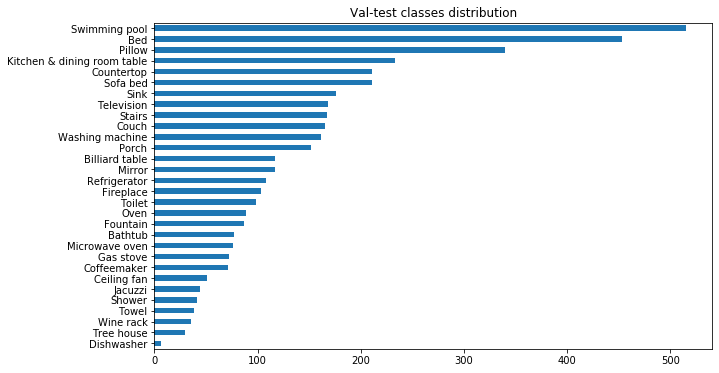

In [13]:
val_test_annots.ClassName.value_counts().sort_values().plot(kind="barh", title="Val-test classes distribution", figsize=(10, 6));

In [14]:
val_test_annots.ClassName.value_counts()

Swimming pool                  515
Bed                            453
Pillow                         340
Kitchen & dining room table    233
Countertop                     211
Sofa bed                       211
Sink                           176
Television                     168
Stairs                         167
Couch                          165
Washing machine                161
Porch                          152
Mirror                         117
Billiard table                 117
Refrigerator                   108
Fireplace                      103
Toilet                          98
Oven                            89
Fountain                        87
Bathtub                         77
Microwave oven                  76
Gas stove                       72
Coffeemaker                     71
Ceiling fan                     51
Jacuzzi                         44
Shower                          41
Towel                           38
Wine rack                       35
Tree house          

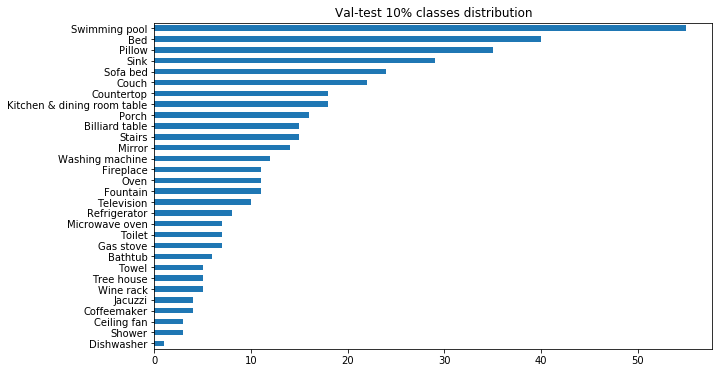

In [15]:
# Sample 10% of the data & check distributions 
val_test_10_annots = val_test_annots.sample(frac=0.1)
val_test_10_annots.ClassName.value_counts().sort_values().plot(kind="barh", title="Val-test 10% classes distribution", figsize=(10, 6));

In [29]:
# Save val_test_10_image_ids to list
val_test_10_image_ids = list(set(val_test_10_annots.ImageID.tolist()))
val_test_10_image_ids[:10], len(val_test_10_image_ids)

(['1296dd4bddd64817',
  'af951685c7c5278f',
  'c6e690a9fc7f5ef8',
  '757a1631131f4ba3',
  '6a9ce7a7b5f39787',
  'dd06af30e45e4b19',
  '771a44e8d370d94a',
  '0f731adcd7458c2b',
  '409019c958741906',
  'a427ff0d310ad27a'],
 401)

In [37]:
# # Move val_test_10_image_ids images to val_test_10 (replace the ones which are there)
# from shutil import copy

# # Move 10% of val_test images into their own folder
# for img in val_test_10_image_ids:
#     #print(f"Copying: {img}")
#     copy("val_test/"+img+".jpg", "val_test_10")

### 10% of val-test image distributions

In [39]:
val_test_10_annots = format_annotations(image_folder="val_test_10", 
                                        annotation_file="val-test-annotations.csv", 
                                        target_classes=subset)
val_test_10_annots.head()

,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,IsGroupOf,IsDepiction,IsInside,ClassName,ClassID
501580,4c1649f8d5b677d3,freeform,/m/03dnzn,1,0.000000,0.984500,0.319811,0.999994,0,1,0,0,0,Bathtub,0
635183,83f459662fc4fb12,freeform,/m/03dnzn,1,0.009929,0.999955,0.430541,0.999577,0,1,0,0,0,Bathtub,0
915071,f9f6d0ce7325d286,freeform,/m/03dnzn,1,0.012309,0.933887,0.781339,1.000000,0,0,0,0,0,Bathtub,0
879031,eb1abf6933be7682,freeform,/m/03dnzn,1,0.000503,1.000000,0.301573,0.996929,1,1,0,0,0,Bathtub,0
784065,c2ddf0678c9cfe8c,freeform,/m/03dnzn,1,0.244279,0.887022,0.497204,1.000000,0,0,0,0,0,Bathtub,0


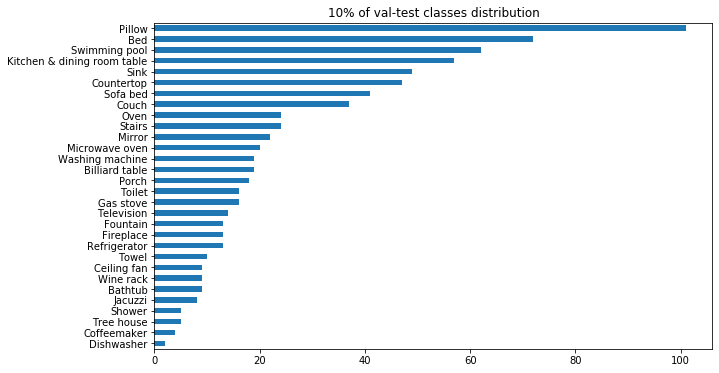

In [40]:
val_test_10_annots.ClassName.value_counts().sort_values().plot(kind="barh", title="10% of val-test classes distribution", figsize=(10, 6));

In [41]:
val_test_10_annots.ClassName.value_counts()

Pillow                         101
Bed                             72
Swimming pool                   62
Kitchen & dining room table     57
Sink                            49
Countertop                      47
Sofa bed                        41
Couch                           37
Oven                            24
Stairs                          24
Mirror                          22
Microwave oven                  20
Billiard table                  19
Washing machine                 19
Porch                           18
Toilet                          16
Gas stove                       16
Television                      14
Fountain                        13
Fireplace                       13
Refrigerator                    13
Towel                           10
Ceiling fan                      9
Wine rack                        9
Bathtub                          9
Jacuzzi                          8
Shower                           5
Tree house                       5
Coffeemaker         

In [43]:
# Save val_test_10% annotations to CSV
val_test_10_annots.to_csv("subset-val-test-10-annotations.csv")

## Create labels of images/image splits 

Create all JSON labels for all splits of data. Check to see if the preprocessing functions work for each dataset split. 

In [52]:
from preprocessing import get_image_dicts

In [54]:
# Create validation image dictionaries
val_img_dicts = get_image_dicts("validation",
                                "validation-annotations-bbox.csv",
                                target_classes=subset)

Using validation-annotations-bbox.csv for annotations...


3it [00:00, 28.36it/s]

On dataset: validation
Classes we're using:
 Swimming pool                  161
Bed                            125
Kitchen & dining room table     76
Pillow                          76
Countertop                      68
Couch                           61
Sofa bed                        61
Sink                            57
Porch                           52
Stairs                          45
Television                      44
Fireplace                       41
Washing machine                 40
Toilet                          37
Oven                            36
Mirror                          33
Billiard table                  32
Microwave oven                  30
Refrigerator                    26
Fountain                        24
Gas stove                       23
Coffeemaker                     21
Bathtub                         18
Wine rack                       17
Jacuzzi                         16
Ceiling fan                     11
Tree house                      11
Shower    

859it [00:23, 35.99it/s]

Saving labels to: validation/validation_labels.json...


In [55]:
# Create val_test image dictionaries
val_test_img_dicts = get_image_dicts("val_test",
                                     "val-test-annotations.csv",
                                     target_classes=subset)

Using val-test-annotations.csv for annotations...


3it [00:00, 28.56it/s]

On dataset: train
Classes we're using:
 Swimming pool                  515
Bed                            453
Pillow                         340
Kitchen & dining room table    233
Countertop                     211
Sofa bed                       211
Sink                           176
Television                     168
Stairs                         167
Couch                          165
Washing machine                161
Porch                          152
Mirror                         117
Billiard table                 117
Refrigerator                   108
Fireplace                      103
Toilet                          98
Oven                            89
Fountain                        87
Bathtub                         77
Microwave oven                  76
Gas stove                       72
Coffeemaker                     71
Ceiling fan                     51
Jacuzzi                         44
Shower                          41
Towel                           38
Wine rack      

2971it [01:13, 40.22it/s]


Saving labels to: val_test/train_labels.json...


In [56]:
# Create train image dictionaries
train_img_dicts = get_image_dicts("train",
                                  "train-annotations-bbox.csv",
                                  target_classes=subset)

Using train-annotations-bbox.csv for annotations...


0it [00:00, ?it/s]

On dataset: train
Classes we're using:
 Stairs                         5981
Couch                          4259
Swimming pool                  3881
Porch                          3854
Television                     3789
Fountain                       3691
Bed                            3563
Pillow                         3508
Countertop                     3113
Kitchen & dining room table    2127
Sink                           1648
Mirror                         1572
Sofa bed                       1501
Toilet                         1099
Billiard table                  912
Fireplace                       711
Washing machine                 655
Oven                            637
Refrigerator                    592
Bathtub                         545
Gas stove                       526
Microwave oven                  485
Ceiling fan                     478
Towel                           338
Coffeemaker                     323
Wine rack                       254
Shower                  

34835it [27:27, 21.15it/s]


Saving labels to: train/train_labels.json...


In [57]:
# Create train 10% image dictionaries
train_10_img_dicts = get_image_dicts("train_10",
                                     "train-annotations-bbox.csv",
                                     target_classes=subset)

Using train-annotations-bbox.csv for annotations...


1it [00:00,  9.92it/s]

On dataset: train
Classes we're using:
 Stairs                         561
Pillow                         433
Couch                          419
Television                     392
Porch                          379
Bed                            375
Swimming pool                  370
Fountain                       357
Countertop                     321
Kitchen & dining room table    243
Sink                           154
Mirror                         136
Sofa bed                       134
Toilet                         106
Billiard table                  85
Oven                            64
Bathtub                         60
Washing machine                 59
Fireplace                       59
Refrigerator                    59
Ceiling fan                     53
Microwave oven                  47
Coffeemaker                     47
Wine rack                       45
Gas stove                       41
Towel                           31
Shower                          30
Jacuzzi        

3483it [01:36, 36.16it/s]

Saving labels to: train_10/train_labels.json...


In [59]:
# Create val_test 10% image dictionaries
val_test_10_img_dicts = get_image_dicts("val_test_10",
                                        "val-test-annotations-bbox.csv",
                                        target_classes=subset)

Using val-test-annotations-bbox.csv for annotations...


6it [00:00, 58.26it/s]

On dataset: train
Classes we're using:
 Pillow                         101
Bed                             72
Swimming pool                   62
Kitchen & dining room table     57
Sink                            49
Countertop                      47
Sofa bed                        41
Couch                           37
Oven                            24
Stairs                          24
Mirror                          22
Microwave oven                  20
Billiard table                  19
Washing machine                 19
Porch                           18
Toilet                          16
Gas stove                       16
Television                      14
Fountain                        13
Fireplace                       13
Refrigerator                    13
Towel                           10
Ceiling fan                      9
Wine rack                        9
Bathtub                          9
Jacuzzi                          8
Shower                           5
Tree house     

401it [00:07, 56.83it/s]

Saving labels to: val_test_10/train_labels.json...


In [61]:
# Create test labels in JSON
test_img_dicts = get_image_dicts("test",
                                 "test-annotations-bbox.csv",
                                 target_classes=subset)

Using test-annotations-bbox.csv for annotations...


2it [00:00, 15.69it/s]

On dataset: train
Classes we're using:
 Swimming pool                  354
Bed                            328
Pillow                         264
Kitchen & dining room table    157
Sofa bed                       150
Countertop                     143
Television                     124
Stairs                         122
Washing machine                121
Sink                           119
Couch                          104
Porch                          100
Billiard table                  85
Mirror                          84
Refrigerator                    82
Fountain                        63
Fireplace                       62
Toilet                          61
Bathtub                         59
Oven                            53
Coffeemaker                     50
Gas stove                       49
Microwave oven                  46
Ceiling fan                     40
Shower                          32
Towel                           29
Jacuzzi                         28
Tree house     

2112it [00:58, 36.27it/s]


Saving labels to: test/train_labels.json...


In [1]:
# # Save JSON labels to GCP
# !gsutil -m cp -r val_test_10/*.json gs://airbnb-amenity-detection/open-images-data
# !gsutil -m cp -r val_test/*.json gs://airbnb-amenity-detection/open-images-data
# !gsutil -m cp -r test/*.json gs://airbnb-amenity-detection/open-images-data
# !gsutil -m cp -r validation/*.json gs://airbnb-amenity-detection/open-images-data
# !gsutil -m cp -r train/*.json gs://airbnb-amenity-detection/open-images-data
!gsutil -m cp -r train_10/*.json gs://airbnb-amenity-detection/open-images-data

Copying file://train_10/train_10_labels.json [Content-Type=application/json]...
/ [1/1 files][751.6 KiB/751.6 KiB] 100% Done                                    
Operation completed over 1 objects/751.6 KiB.                                    


In [1]:
!gsutil -m cp -r output gs://airbnb-amenity-detection/open-images-data

Copying file://output/model_0169999.pth [Content-Type=application/octet-stream]...
Copying file://output/events.out.tfevents.1585457051.airbnb-amenity-detection-image-1.6086.0 [Content-Type=application/octet-stream]...
Copying file://output/model_0099999.pth [Content-Type=application/octet-stream]...
Copying file://output/model_0109999.pth [Content-Type=application/octet-stream]...
Copying file://output/model_0164999.pth [Content-Type=application/octet-stream]...
==> NOTE: You are uploading one or more large file(s), which would run
significantly faster if you enable parallel composite uploads. This
feature can be enabled by editing the
"parallel_composite_upload_threshold" value in your .boto
configuration file. However, note that if you do this large files will
be uploaded as `composite objects
<https://cloud.google.com/storage/docs/composite-objects>`_,which
means that any user who downloads such objects will need to have a
compiled crcmod installed (see "gsutil help crcmod"). This 

In [1]:
project_id = 'daniels-dl-playground'
!gcloud config set project {project_id}
!gsutil ls

Updated property [core/project].


To take a quick anonymous survey, run:
  $ gcloud survey

gs://airbnb-amenity-detection/


In [4]:
!gcloud auth login


You are running on a Google Compute Engine virtual machine.
It is recommended that you use service accounts for authentication.

You can run:

  $ gcloud config set account `ACCOUNT`

to switch accounts if necessary.

Your credentials may be visible to others with access to this
virtual machine. Are you sure you want to authenticate with
your personal account?

Do you want to continue (Y/n)?  ^C


Command killed by keyboard interrupt



In [8]:
!gsutil -m cp -r gs://airbnb-amenity-detection/open-images-data/val_test .

Copying gs://airbnb-amenity-detection/open-images-data/val_test/003b53edf0d0773c.jpg...
Copying gs://airbnb-amenity-detection/open-images-data/val_test/0050f23b3c75999b.jpg...
Copying gs://airbnb-amenity-detection/open-images-data/val_test/0052ea56ee869426.jpg...
Copying gs://airbnb-amenity-detection/open-images-data/val_test/0056ffa38a8489b6.jpg...
Copying gs://airbnb-amenity-detection/open-images-data/val_test/0093327faea501b8.jpg...
Copying gs://airbnb-amenity-detection/open-images-data/val_test/007f71665b0812a7.jpg...
Copying gs://airbnb-amenity-detection/open-images-data/val_test/00a55e292e46550a.jpg...
Copying gs://airbnb-amenity-detection/open-images-data/val_test/00abaabafe892423.jpg...
Copying gs://airbnb-amenity-detection/open-images-data/val_test/00cd932265611688.jpg...
Copying gs://airbnb-amenity-detection/open-images-data/val_test/00ce2a25a3a64537.jpg...
Copying gs://airbnb-amenity-detection/open-images-data/val_test/00d480139b4eff48.jpg...
Copying gs://airbnb-amenity-dete